## Import Necessary Libraries

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize




Solving environment: done

# All requested packages already installed.



In [5]:
import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


vincent-0.4.4        | 28 KB     | ##################################### | 1

In [5]:
!conda install -c conda-forge geocoder --yes
import geocoder
lat_lng_coords = None
geolocator = Nominatim(user_agent="Segmenting and Clustering Toronto")
location = geolocator.geocode('Toronto, Ontario')
latitude = location.latitude
longitude = location.longitude
print(latitude)
print(longitude)

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

    geocoder: 1.38.1-py_1 conda-forge
    ratelim:  0.1.6-py_2  conda-forge


ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
43.6534817
-79.3839347


## Import dataset from internet

In [6]:
url_html = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050'


In [7]:
df = pd.read_html(url_html)
len(df)
toronto_neigh = df[0]
toronto_neigh.head(12)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


In [8]:
toronto_neigh.replace(np.nan, "Not assigned", inplace=True)
toronto_neigh.columns

Index(['Postcode', 'Borough', 'Neighbourhood'], dtype='object')

In [9]:
toronto_neigh.shape

(287, 3)

In [10]:
toronto_neigh.rename({'Postcode':'PostalCode'}, axis = 'columns', inplace = True)

## Clean data

In [11]:
df = toronto_neigh
toronto_df = df[ (df['Borough'] != 'Not assigned')]
toronto_df.head(12)

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [12]:
toronto_neigh=df[df['Borough'].str.contains('Toronto')]
toronto_neigh.head(10)

,PostalCode,Borough,Neighbourhood
4,M5A,Downtown Toronto,Harbourfront
7,M7A,Downtown Toronto,Queen's Park
16,M5B,Downtown Toronto,Ryerson
17,M5B,Downtown Toronto,Garden District
33,M5C,Downtown Toronto,St. James Town
46,M4E,East Toronto,The Beaches
47,M5E,Downtown Toronto,Berczy Park
56,M5G,Downtown Toronto,Central Bay Street
57,M6G,Downtown Toronto,Christie
67,M5H,Downtown Toronto,Adelaide


In [13]:
geo = 'http://cocl.us/Geospatial_data'
geo_df = pd.read_csv(geo)

geo_df.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [14]:
geo_df.rename({'Postal Code':'PostalCode'}, axis = 'columns', inplace = True)
geo_df.head(10)

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


## Merge datasets

In [15]:
df_neigh = pd.merge(toronto_neigh, geo_df, on='PostalCode')
df_neigh.head(12)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,M5B,Downtown Toronto,Ryerson,43.657162,-79.378937
3,M5B,Downtown Toronto,Garden District,43.657162,-79.378937
4,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
5,M4E,East Toronto,The Beaches,43.676357,-79.293031
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,M6G,Downtown Toronto,Christie,43.669542,-79.422564
9,M5H,Downtown Toronto,Adelaide,43.650571,-79.384568


## Foursquare Credentials

In [28]:
# foursquare crendentials
CLIENT_ID = 'VAMYR4JCDFF3U1XBQIN1DE1Y5U4MI35CXMY.....' # your Foursquare ID
CLIENT_SECRET = 'W3MIJ3QSKQDC2TKPD1RKCDBEGOKS4VZNHMD......' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 400 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
toronto_venues = getNearbyVenues(names=df_neigh['Neighbourhood'],
                                   latitudes=df_neigh['Latitude'],
                                   longitudes=df_neigh['Longitude']
                                  )

Harbourfront
Queen's Park
Ryerson
Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide
King
Richmond
Dovercourt Village
Dufferin
Harbourfront East
Toronto Islands
Union Station
Little Portugal
Trinity
The Danforth West
Riverdale
Design Exchange
Toronto Dominion Centre
Brockton
Exhibition Place
Parkdale Village
The Beaches West
India Bazaar
Commerce Court
Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North
Forest Hill West
High Park
The Junction South
North Toronto West
The Annex
North Midtown
Yorkville
Parkdale
Roncesvalles
Davisville
Harbord
University of Toronto
Runnymede
Swansea
Moore Park
Summerhill East
Chinatown
Grange Park
Kensington Market
Deer Park
Forest Hill SE
Rathnelly
South Hill
Summerhill West
CN Tower
Bathurst Quay
Island airport
Harbourfront West
King and Spadina
Railway Lands
South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown
St. James Town
First Canadian Place
Underground city

In [32]:
toronto_venues.groupby('Neighborhood')['Venue Category'].count().head()

Neighborhood
Adelaide                                             100
Bathurst Quay                                         16
Berczy Park                                           56
Brockton                                              23
Business Reply Mail Processing Centre 969 Eastern     15
Name: Venue Category, dtype: int64

In [33]:
print('There are {} uniques venue categories.'.format(len(toronto_venues['Venue Category'].unique())))


There are 236 uniques venue categories.


In [35]:
toronto_urban = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")


toronto_urban['YNeighborhood'] = toronto_venues['Neighborhood'] 

toronto_urban.columns[-1]


fixed_columns = [toronto_urban.columns[-1]] + list(toronto_urban.columns[:-1])
toronto_onehot = toronto_urban[fixed_columns]
toronto_urban.rename(columns={'YNeighborhood': 'TheNeighborhood'}, inplace=True)

toronto_urban.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,TheNeighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harbourfront
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [36]:
toronto_grouped = toronto_urban.groupby('TheNeighborhood').mean().reset_index()
toronto_grouped.head()

,TheNeighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Adelaide,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.02,0.0,0.0,0.010000,0.0,0.02,0.0,0.000000,0.000000,0.0,0.000000,0.030000,0.0,0.030000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.02,0.0000,0.01,0.020000,0.000000,0.0,0.01,0.01,0.010000,0.0,0.000000,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.02,0.000000,0.060000,0.0,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,0.010000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.0,0.0,0.000000,0.010000,0.0,0.0,0.000000,0.0,0.0,0.01,0.01,0.0,0.000000,0.000000,0.0,0.0,0.

In [37]:
top_venues = 5

for hood in toronto_grouped['TheNeighborhood'].head():
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['TheNeighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Adelaide----
             venue  freq
0       Restaurant  0.06
1      Coffee Shop  0.06
2             Café  0.05
3              Bar  0.03
4  Thai Restaurant  0.03


----Bathurst Quay----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2  Airport Terminal  0.12
3   Harbor / Marina  0.06
4     Boat or Ferry  0.06


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2   Cheese Shop  0.04
3    Restaurant  0.04
4        Bakery  0.04


----Brockton----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2       Nightclub  0.09
3     Coffee Shop  0.09
4    Intersection  0.04


----Business Reply Mail Processing Centre 969 Eastern----
                  venue  freq
0           Yoga Studio  0.07
1         Auto Workshop  0.07
2         Garden Center  0.07
3    Light Rail Station  0.07
4  Fast Food Restaurant  0.07




In [40]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [41]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['TheNeighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['TheNeighborhood'] = toronto_grouped['TheNeighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head()

,TheNeighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Restaurant,Coffee Shop,Café,Bar,Bakery,Thai Restaurant,Office,Hotel,Lounge,Cosmetics Shop
1,Bathurst Quay,Airport Lounge,Airport Service,Airport Terminal,Sculpture Garden,Coffee Shop,Airport,Airport Food Court,Airport Gate,Harbor / Marina,Rental Car Location
2,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Restaurant,Cheese Shop,Café,Diner
3,Brockton,Café,Nightclub,Coffee Shop,Breakfast Spot,Pet Store,Bakery,Performing Arts Venue,Climbing Gym,Restaurant,Burrito Place
4,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Light Rail Station,Smoke Shop,Brewery,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant


In [42]:
toronto_grouped_clustering = toronto_grouped.drop('TheNeighborhood', 1)

In [43]:
# 
# find the best k (number of clusters) regarding the inertia_ score
#
Ks = 7 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 12).fit(toronto_grouped_clustering)
    inertias[n-1] = kmeans.inertia_

# display the inertia    
inertias

array([5.08517463, 4.11186159, 3.51422412, 2.96258523, 2.6092003 ,
       2.3258149 ])

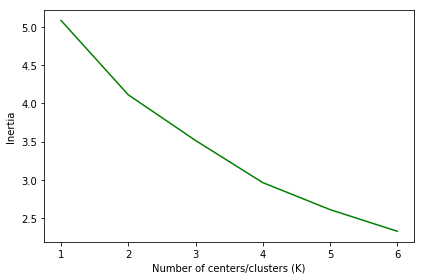

In [44]:
plt.plot(range(1,Ks),inertias,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init = 12).fit(toronto_grouped_clustering)
kmeans.labels_[0:40] 

array([0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 3, 0, 0], dtype=int32)

In [46]:
print("number of clusters:", len(kmeans.cluster_centers_))
#print("cluster center:" , kmeans.cluster_centers_)
print("number of iterations:", kmeans.n_iter_)
print("inertia (Sum of squared distances of samples to cluster center): ", kmeans.inertia_)

number of clusters: 5
number of iterations: 2
inertia (Sum of squared distances of samples to cluster center):  2.609200301044232


In [61]:
neighborhoods_venues_sorted.insert(0, 'Clusters Labels', kmeans.labels_)
neighborhoods_venues_sorted.astype({'Cluster Labels':'int32'},copy=False)

toronto_tor = df_neigh

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_tor = toronto_tor.merge(neighborhoods_venues_sorted.set_index('TheNeighborhood'), how='left', right_on='TheNeighborhood', left_on='Neighbourhood')

In [62]:
toronto_merged = toronto_tor[ toronto_tor['Neighbourhood'] != "Queen\'s Park"]
toronto_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Clusters Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,0,Coffee Shop,Pub,Park,Theater,Breakfast Spot,Café,Bakery,Restaurant,Mexican Restaurant,Yoga Studio
2,M5B,Downtown Toronto,Ryerson,43.657162,-79.378937,0,0,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Japanese Restaurant,Cosmetics Shop,Restaurant,Thai Restaurant,Pizza Place,Fast Food Restaurant
3,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,0,0,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Japanese Restaurant,Cosmetics Shop,Restaurant,Thai Restaurant,Pizza Place,Fast Food Restaurant
4,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,0,Coffee Shop,Italian Restaurant,Café,Restaurant,Bakery,Japanese Restaurant,Diner,Breakfast Spot,Cosmetics Shop,Gastropub
5,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,0,Trail,Neighborhood,Health Food Store,Pub,Yoga Studio,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


In [63]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of toronto are 43.6534817, -79.3839347.


In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)


x = np.arange(len(df_neigh['Clusters Labels'].value_counts()))
ys = [i + x + (i*x)**2 for i in range(len(df_neigh['Clusters Labels'].value_counts()))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
count=0


markers_colors = []
for lat, lon, poi, cluster in zip(df_neigh['Latitude'], df_neigh['Longitude'], df_neigh['Neighbourhood'], df_neigh['Clusters Labels']):
    label = folium.Popup(str(poi) + '/ Cluster is ' + str(cluster), parse_html=True)  
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters